In [2]:
import pandas as pd

# Read all four CSV files
df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/grid_search_results_allCT_1.0k.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/grid_search_results_GSE114412_cluster.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/grid_search_results_group_5_subset_76_ncells_7.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/grid_search_results_GSE114412_subcluster.csv')

# Collect all cLISI values from all datasets and all embedding types
all_clisi = []
for df in [df1, df2, df3, df4]:
    all_clisi.extend(df['clisi_raw'].values)
    all_clisi.extend(df['clisi_pca'].values)
    all_clisi.extend(df['clisi_vae'].values)
    all_clisi.extend(df['clisi_denoised'].values)

# Print the range
print(f"cLISI range across all datasets: {min(all_clisi):.4f} to {max(all_clisi):.4f}")

cLISI range across all datasets: 0.8211 to 0.9934


In [8]:
import pandas as pd

# Read the group_5 multiple runs dataset
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/multiple_run_group_5_subset_76_ncells_7_nruns_10.csv')

# Calculate mean and std for HVG label transfer accuracy
mean_hvg = df3['lt_hvg_test_acc'].mean()
std_hvg = df3['lt_hvg_test_acc'].std()

print(f"HVG Label Transfer Accuracy for group_5_subset_76_ncells_7 (n={len(df3)} runs):")
print(f"Mean: {mean_hvg:.4f}")
print(f"Standard Deviation: {std_hvg:.4f}")

HVG Label Transfer Accuracy for group_5_subset_76_ncells_7 (n=10 runs):
Mean: 0.9490
Standard Deviation: 0.0069


In [9]:
import pandas as pd

# Read the group_5 multiple runs dataset
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/multiple_run_group_5_subset_76_ncells_7_nruns_10.csv')

# Calculate mean and std for label transfer accuracy for each embedding method
hvg_mean = df3['lt_hvg_test_acc'].mean()
hvg_std = df3['lt_hvg_test_acc'].std()

pca_mean = df3['lt_pca_test_acc'].mean()
pca_std = df3['lt_pca_test_acc'].std()

vae_mean = df3['lt_vae_test_acc'].mean()
vae_std = df3['lt_vae_test_acc'].std()

ldm_mean = df3['lt_denoised_test_acc'].mean()
ldm_std = df3['lt_denoised_test_acc'].std()

# Print comparison
print(f"Label Transfer Accuracy Comparison for group_5_subset_76_ncells_7 (n={len(df3)} runs):")
print(f"{'='*70}")
print(f"{'Method':<15} {'Mean ± Std':<25} {'Improvement over HVG':<30}")
print(f"{'='*70}")
print(f"{'HVG':<15} {hvg_mean:.4f} ± {hvg_std:.4f}           {'Baseline':<30}")
print(f"{'PCA':<15} {pca_mean:.4f} ± {pca_std:.4f}           {f'{((pca_mean - hvg_mean) / hvg_mean * 100):+.2f}%':<30}")
print(f"{'VAE':<15} {vae_mean:.4f} ± {vae_std:.4f}           {f'{((vae_mean - hvg_mean) / hvg_mean * 100):+.2f}%':<30}")
print(f"{'LDM (Denoised)':<15} {ldm_mean:.4f} ± {ldm_std:.4f}           {f'{((ldm_mean - hvg_mean) / hvg_mean * 100):+.2f}%':<30}")
print(f"{'='*70}")

# Also compare LDM to PCA and VAE
print(f"\nLDM improvement over PCA: {((ldm_mean - pca_mean) / pca_mean * 100):+.2f}%")
print(f"LDM improvement over VAE: {((ldm_mean - vae_mean) / vae_mean * 100):+.2f}%")

# Show if improvements are meaningful relative to std
print(f"\nStatistical context:")
print(f"LDM vs HVG difference: {(ldm_mean - hvg_mean):.4f} ({(ldm_mean - hvg_mean) / hvg_std:.2f} × HVG std)")
print(f"LDM vs PCA difference: {(ldm_mean - pca_mean):.4f} ({(ldm_mean - pca_mean) / pca_std:.2f} × PCA std)")
print(f"LDM vs VAE difference: {(ldm_mean - vae_mean):.4f} ({(ldm_mean - vae_mean) / vae_std:.2f} × VAE std)")

# Also print F1 scores for completeness
print(f"\n{'='*70}")
print(f"Label Transfer F1 Score Comparison:")
print(f"{'='*70}")
hvg_f1_mean = df3['lt_hvg_test_f1'].mean()
hvg_f1_std = df3['lt_hvg_test_f1'].std()

pca_f1_mean = df3['lt_pca_test_f1'].mean()
pca_f1_std = df3['lt_pca_test_f1'].std()

vae_f1_mean = df3['lt_vae_test_f1'].mean()
vae_f1_std = df3['lt_vae_test_f1'].std()

ldm_f1_mean = df3['lt_denoised_test_f1'].mean()
ldm_f1_std = df3['lt_denoised_test_f1'].std()

print(f"{'HVG':<15} {hvg_f1_mean:.4f} ± {hvg_f1_std:.4f}")
print(f"{'PCA':<15} {pca_f1_mean:.4f} ± {pca_f1_std:.4f}")
print(f"{'VAE':<15} {vae_f1_mean:.4f} ± {vae_f1_std:.4f}")
print(f"{'LDM (Denoised)':<15} {ldm_f1_mean:.4f} ± {ldm_f1_std:.4f}")

Label Transfer Accuracy Comparison for group_5_subset_76_ncells_7 (n=10 runs):
Method          Mean ± Std                Improvement over HVG          
HVG             0.9490 ± 0.0069           Baseline                      
PCA             0.9309 ± 0.0084           -1.91%                        
VAE             0.9515 ± 0.0073           +0.26%                        
LDM (Denoised)  0.9497 ± 0.0078           +0.08%                        

LDM improvement over PCA: +2.02%
LDM improvement over VAE: -0.19%

Statistical context:
LDM vs HVG difference: 0.0007 (0.10 × HVG std)
LDM vs PCA difference: 0.0188 (2.24 × PCA std)
LDM vs VAE difference: -0.0018 (-0.24 × VAE std)

Label Transfer F1 Score Comparison:
HVG             0.9488 ± 0.0070
PCA             0.9298 ± 0.0083
VAE             0.9511 ± 0.0073
LDM (Denoised)  0.9492 ± 0.0079


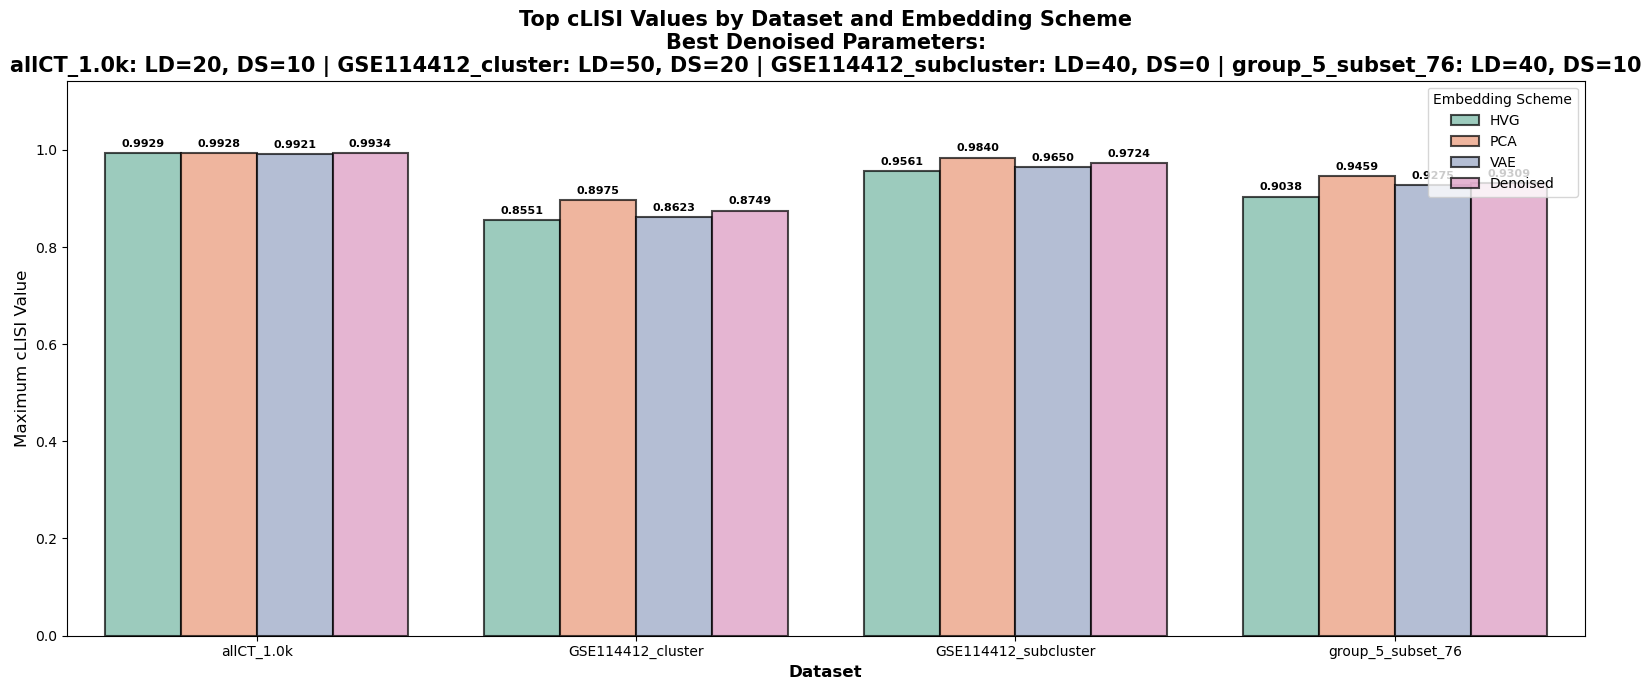


Maximum cLISI values - allCT_1.0k:
PCA: 0.9928
VAE: 0.9921
Denoised: 0.9934
HVG: 0.9929

Maximum cLISI values - GSE114412_cluster:
PCA: 0.8975
VAE: 0.8623
Denoised: 0.8749
HVG: 0.8551

Maximum cLISI values - GSE114412_subcluster:
PCA: 0.9840
VAE: 0.9650
Denoised: 0.9724
HVG: 0.9561

Maximum cLISI values - group_5_subset_76_ncells_7:
PCA: 0.9459
VAE: 0.9275
Denoised: 0.9309
HVG: 0.9038


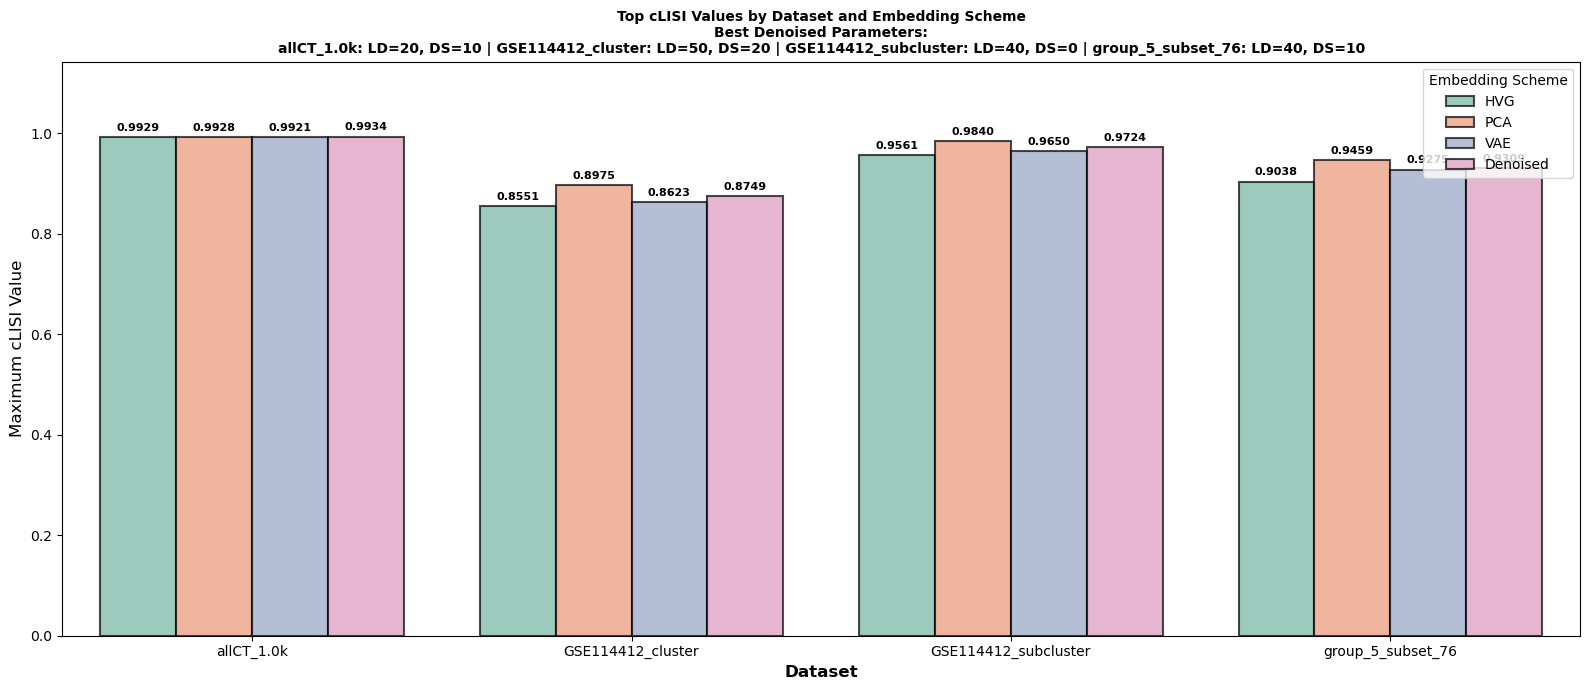


Maximum cLISI values - allCT_1.0k:
PCA: 0.9928
VAE: 0.9921
Denoised: 0.9934
HVG: 0.9929

Maximum cLISI values - GSE114412_cluster:
PCA: 0.8975
VAE: 0.8623
Denoised: 0.8749
HVG: 0.8551

Maximum cLISI values - GSE114412_subcluster:
PCA: 0.9840
VAE: 0.9650
Denoised: 0.9724
HVG: 0.9561

Maximum cLISI values - group_5_subset_76_ncells_7:
PCA: 0.9459
VAE: 0.9275
Denoised: 0.9309
HVG: 0.9038


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/grid_search_results_allCT_1.0k.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/grid_search_results_GSE114412_cluster.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/grid_search_results_group_5_subset_76_ncells_7.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/grid_search_results_GSE114412_subcluster.csv')

# Get the maximum cLISI value for each embedding scheme
# df1, df2, df3 use 'clisi_hvg', df4 uses 'clisi_raw'
max_clisi_df1 = {
    'PCA': df1['clisi_pca'].max(),
    'VAE': df1['clisi_vae'].max(),
    'Denoised': df1['clisi_denoised'].max(),
    'HVG': df1['clisi_raw'].max()  # Changed from 'clisi_raw' to 'clisi_raw'
}

max_clisi_df2 = {
    'PCA': df2['clisi_pca'].max(),
    'VAE': df2['clisi_vae'].max(),
    'Denoised': df2['clisi_denoised'].max(),
    'HVG': df2['clisi_raw'].max()  # Changed from 'clisi_raw' to 'clisi_raw'
}

max_clisi_df3 = {
    'PCA': df3['clisi_pca'].max(),
    'VAE': df3['clisi_vae'].max(),
    'Denoised': df3['clisi_denoised'].max(),
    'HVG': df3['clisi_raw'].max()  # Changed from 'clisi_raw' to 'clisi_raw'
}

max_clisi_df4 = {
    'PCA': df4['clisi_pca'].max(),
    'VAE': df4['clisi_vae'].max(),
    'Denoised': df4['clisi_denoised'].max(),
    'HVG': df4['clisi_raw'].max()  # Uses 'clisi_raw' but labeled as 'raw' for consistency
}

# Create a dataframe for plotting
plot_data = []
for dataset_name, max_clisi_dict in [('allCT_1.0k', max_clisi_df1),
                                      ('GSE114412_cluster', max_clisi_df2),
                                      ('GSE114412_subcluster', max_clisi_df3),
                                      ('group_5_subset_76', max_clisi_df4)]:  # Added 4th dataset
    for embedding in ['HVG', 'PCA', 'VAE', 'Denoised']:  # Changed 'Raw HVG' to 'HVG'
        plot_data.append({
            'Dataset': dataset_name,
            'Max cLISI': max_clisi_dict[embedding],
            'Embedding': embedding
        })

plot_df = pd.DataFrame(plot_data)

# Create the bar plot with Set2 palette
plt.figure(figsize=(16, 7))  # Made wider to accommodate 4 datasets
ax = sns.barplot(data=plot_df, x='Dataset', y='Max cLISI', hue='Embedding',
                 palette='Set2',
                 order=['allCT_1.0k', 'GSE114412_cluster', 'GSE114412_subcluster', 'group_5_subset_76'],
                 hue_order=['HVG', 'PCA', 'VAE', 'Denoised'],  # Changed order
                 edgecolor='black', linewidth=1.5, alpha=0.7)

# Customize the plot
plt.xlabel('Dataset', fontsize=12, fontweight='bold')
plt.ylabel('Maximum cLISI Value', fontsize=12)
plt.ylim(0, plot_df['Max cLISI'].max() * 1.15)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3, fontsize=8, fontweight='bold')

# Get best parameters for all four datasets
best_row_df1 = df1.loc[df1['clisi_denoised'].idxmax()]
best_row_df2 = df2.loc[df2['clisi_denoised'].idxmax()]
best_row_df3 = df3.loc[df3['clisi_denoised'].idxmax()]
best_row_df4 = df4.loc[df4['clisi_denoised'].idxmax()]

# Create multi-line title for better readability
plt.title(f'Top cLISI Values by Dataset and Embedding Scheme\n' +
          f'Best Denoised Parameters:\n' +
          f'allCT_1.0k: LD={int(best_row_df1["latent_dim"])}, DS={int(best_row_df1["denoise_steps"])} | ' +
          f'GSE114412_cluster: LD={int(best_row_df2["latent_dim"])}, DS={int(best_row_df2["denoise_steps"])} | ' +
          f'GSE114412_subcluster: LD={int(best_row_df3["latent_dim"])}, DS={int(best_row_df3["denoise_steps"])} | ' +
          f'group_5_subset_76: LD={int(best_row_df4["latent_dim"])}, DS={int(best_row_df4["denoise_steps"])}',
          fontsize=15, fontweight='bold')

plt.legend(title='Embedding Scheme', fontsize=10, loc='upper right')
plt.tight_layout()
plt.savefig('clisi_comparison_four_datasets_set2_palette.png', bbox_inches='tight', dpi=300)
plt.show()

# Print the values for all four datasets
print("\nMaximum cLISI values - allCT_1.0k:")
for embedding, value in max_clisi_df1.items():
    print(f"{embedding}: {value:.4f}")

print("\nMaximum cLISI values - GSE114412_cluster:")
for embedding, value in max_clisi_df2.items():
    print(f"{embedding}: {value:.4f}")

print("\nMaximum cLISI values - GSE114412_subcluster:")
for embedding, value in max_clisi_df3.items():
    print(f"{embedding}: {value:.4f}")

print("\nMaximum cLISI values - group_5_subset_76_ncells_7:")
for embedding, value in max_clisi_df4.items():
    print(f"{embedding}: {value:.4f}")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read all four CSV files
df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/grid_search_results_allCT_1.0k.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/grid_search_results_GSE114412_cluster.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/grid_search_results_group_5_subset_76_ncells_7.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/grid_search_results_GSE114412_subcluster.csv')

# Get the maximum cLISI value for each embedding scheme
# df1, df2, df3 use 'clisi_hvg', df4 uses 'clisi_raw'
max_clisi_df1 = {
    'PCA': df1['clisi_pca'].max(),
    'VAE': df1['clisi_vae'].max(),
    'Denoised': df1['clisi_denoised'].max(),
    'HVG': df1['clisi_raw'].max()  # Changed from 'clisi_raw' to 'clisi_raw'
}

max_clisi_df2 = {
    'PCA': df2['clisi_pca'].max(),
    'VAE': df2['clisi_vae'].max(),
    'Denoised': df2['clisi_denoised'].max(),
    'HVG': df2['clisi_raw'].max()  # Changed from 'clisi_raw' to 'clisi_raw'
}

max_clisi_df3 = {
    'PCA': df3['clisi_pca'].max(),
    'VAE': df3['clisi_vae'].max(),
    'Denoised': df3['clisi_denoised'].max(),
    'HVG': df3['clisi_raw'].max()  # Changed from 'clisi_raw' to 'clisi_raw'
}

max_clisi_df4 = {
    'PCA': df4['clisi_pca'].max(),
    'VAE': df4['clisi_vae'].max(),
    'Denoised': df4['clisi_denoised'].max(),
    'HVG': df4['clisi_raw'].max()  # Uses 'clisi_raw' but labeled as 'raw' for consistency
}

# Create a dataframe for plotting
plot_data = []
for dataset_name, max_clisi_dict in [('allCT_1.0k', max_clisi_df1),
                                      ('GSE114412_cluster', max_clisi_df2),
                                      ('GSE114412_subcluster', max_clisi_df3),
                                      ('group_5_subset_76', max_clisi_df4)]:  # Added 4th dataset
    for embedding in ['HVG', 'PCA', 'VAE', 'Denoised']:  # Changed 'Raw HVG' to 'HVG'
        plot_data.append({
            'Dataset': dataset_name,
            'Max cLISI': max_clisi_dict[embedding],
            'Embedding': embedding
        })

plot_df = pd.DataFrame(plot_data)

# Create the bar plot with Set2 palette
plt.figure(figsize=(16, 7))  # Made wider to accommodate 4 datasets
ax = sns.barplot(data=plot_df, x='Dataset', y='Max cLISI', hue='Embedding',
                 palette='Set2',
                 order=['allCT_1.0k', 'GSE114412_cluster', 'GSE114412_subcluster', 'group_5_subset_76'],
                 hue_order=['HVG', 'PCA', 'VAE', 'Denoised'],  # Changed order
                 edgecolor='black', linewidth=1.5, alpha=0.7)

# Customize the plot
plt.xlabel('Dataset', fontsize=12, fontweight='bold')
plt.ylabel('Maximum cLISI Value', fontsize=12)
plt.ylim(0, plot_df['Max cLISI'].max() * 1.15)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3, fontsize=8, fontweight='bold')

# Get best parameters for all four datasets
best_row_df1 = df1.loc[df1['clisi_denoised'].idxmax()]
best_row_df2 = df2.loc[df2['clisi_denoised'].idxmax()]
best_row_df3 = df3.loc[df3['clisi_denoised'].idxmax()]
best_row_df4 = df4.loc[df4['clisi_denoised'].idxmax()]

# Create multi-line title for better readability
plt.title(f'Top cLISI Values by Dataset and Embedding Scheme\n' +
          f'Best Denoised Parameters:\n' +
          f'allCT_1.0k: LD={int(best_row_df1["latent_dim"])}, DS={int(best_row_df1["denoise_steps"])} | ' +
          f'GSE114412_cluster: LD={int(best_row_df2["latent_dim"])}, DS={int(best_row_df2["denoise_steps"])} | ' +
          f'GSE114412_subcluster: LD={int(best_row_df3["latent_dim"])}, DS={int(best_row_df3["denoise_steps"])} | ' +
          f'group_5_subset_76: LD={int(best_row_df4["latent_dim"])}, DS={int(best_row_df4["denoise_steps"])}',
          fontsize=10, fontweight='bold')

plt.legend(title='Embedding Scheme', fontsize=10, loc='upper right')
plt.tight_layout()
plt.savefig('clisi_comparison_four_datasets_set2_palette.png', bbox_inches='tight', dpi=300)
plt.show()

# Print the values for all four datasets
print("\nMaximum cLISI values - allCT_1.0k:")
for embedding, value in max_clisi_df1.items():
    print(f"{embedding}: {value:.4f}")

print("\nMaximum cLISI values - GSE114412_cluster:")
for embedding, value in max_clisi_df2.items():
    print(f"{embedding}: {value:.4f}")

print("\nMaximum cLISI values - GSE114412_subcluster:")
for embedding, value in max_clisi_df3.items():
    print(f"{embedding}: {value:.4f}")

print("\nMaximum cLISI values - group_5_subset_76_ncells_7:")
for embedding, value in max_clisi_df4.items():
    print(f"{embedding}: {value:.4f}")

### Bars from multiple runs

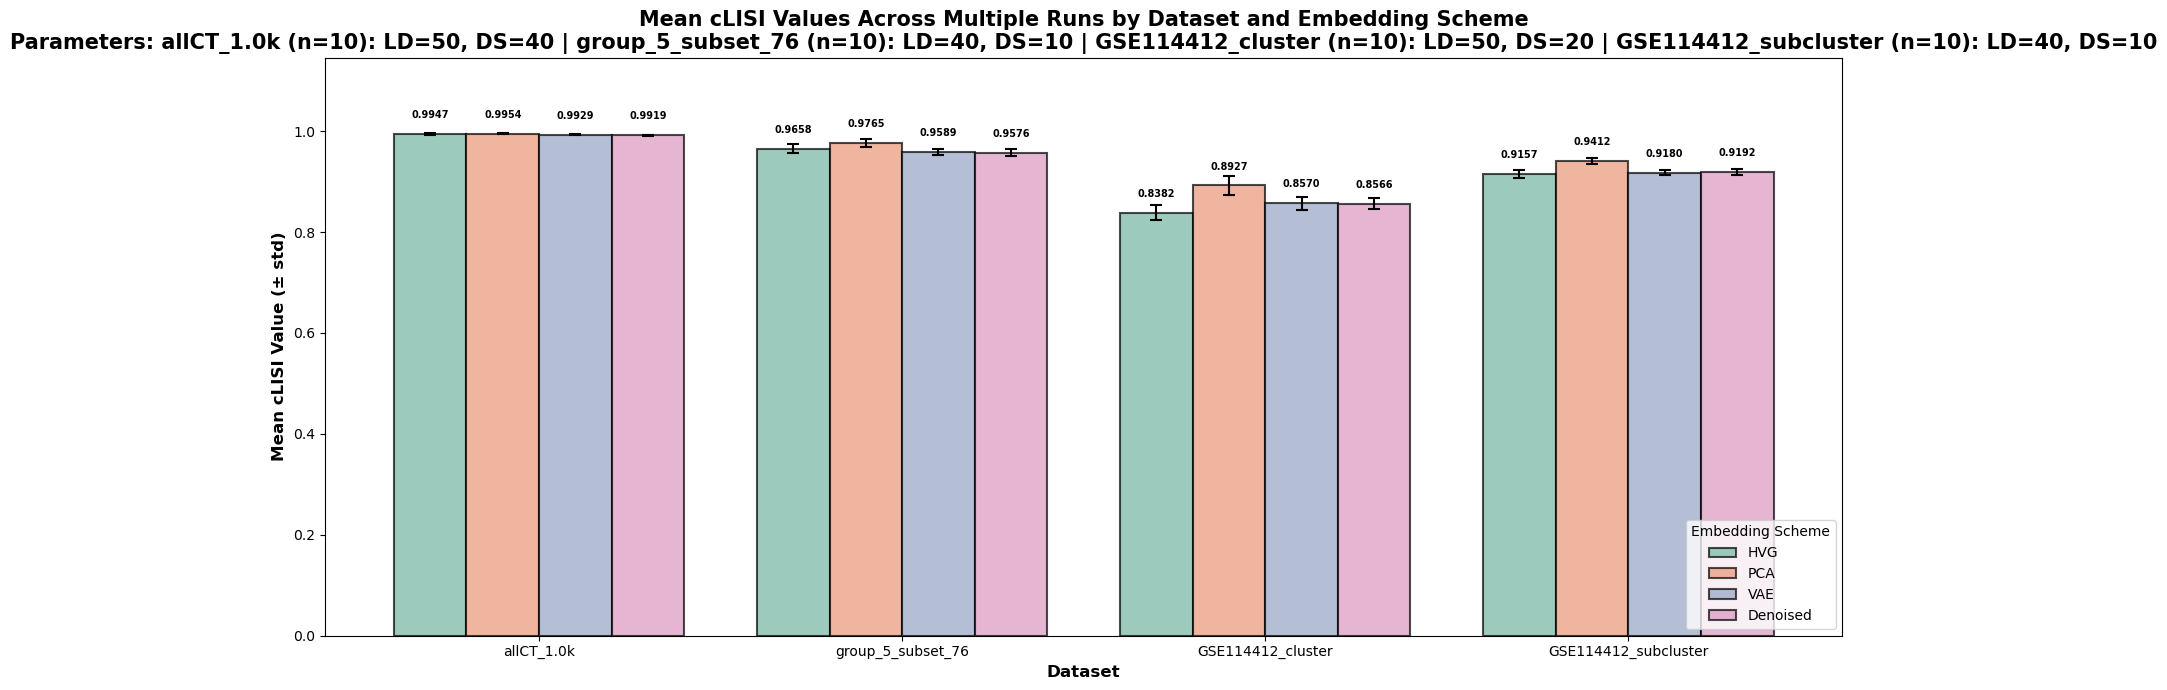


Dataset 1: allCT_1.0k (n=10 runs)
PCA       : 0.9954 ± 0.0013 (min: 0.9936, max: 0.9972)
VAE       : 0.9929 ± 0.0010 (min: 0.9919, max: 0.9946)
DENOISED  : 0.9919 ± 0.0011 (min: 0.9902, max: 0.9943)
HVG       : 0.9947 ± 0.0016 (min: 0.9911, max: 0.9970)

Dataset 2: group_5_subset_76 (n=10 runs)
PCA       : 0.9765 ± 0.0072 (min: 0.9639, max: 0.9910)
VAE       : 0.9589 ± 0.0066 (min: 0.9519, max: 0.9733)
DENOISED  : 0.9576 ± 0.0073 (min: 0.9479, max: 0.9713)
HVG       : 0.9658 ± 0.0092 (min: 0.9476, max: 0.9758)

Dataset 3: GSE114412_cluster (n=10 runs)
PCA       : 0.8927 ± 0.0185 (min: 0.8658, max: 0.9130)
VAE       : 0.8570 ± 0.0123 (min: 0.8323, max: 0.8746)
DENOISED  : 0.8566 ± 0.0111 (min: 0.8459, max: 0.8817)
HVG       : 0.8382 ± 0.0150 (min: 0.8136, max: 0.8585)

Dataset 4: GSE114412_subcluster (n=10 runs)
PCA       : 0.9412 ± 0.0066 (min: 0.9331, max: 0.9562)
VAE       : 0.9180 ± 0.0055 (min: 0.9076, max: 0.9250)
DENOISED  : 0.9192 ± 0.0051 (min: 0.9102, max: 0.9245)
HVG       :

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read all four CSV files
df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/multiple_run_allCT_1.0k_nruns_10.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/multiple_run_GSE114412_cluster_nruns_10.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/multiple_run_group_5_subset_76_ncells_7_nruns_10.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/multiple_run_GSE114412_subcluster_nruns_10.csv')

# Calculate mean and std for each embedding scheme across runs
def get_stats(df):
    return {
        'PCA': {'mean': df['clisi_pca'].mean(), 'std': df['clisi_pca'].std()},
        'VAE': {'mean': df['clisi_vae'].mean(), 'std': df['clisi_vae'].std()},
        'Denoised': {'mean': df['clisi_denoised'].mean(), 'std': df['clisi_denoised'].std()},
        'HVG': {'mean': df['clisi_raw'].mean(), 'std': df['clisi_raw'].std()}
    }

stats_df1 = get_stats(df1)
stats_df2 = get_stats(df2)
stats_df3 = get_stats(df3)
stats_df4 = get_stats(df4)

# Create a dataframe for plotting
plot_data = []
for dataset_name, stats_dict in [('allCT_1.0k', stats_df1),
                                  ('GSE114412_cluster', stats_df2),
                                  ('group_5_subset_76', stats_df3),
                                  ('GSE114412_subcluster', stats_df4)]:
    for embedding in ['HVG', 'PCA', 'VAE', 'Denoised']:
        plot_data.append({
            'Dataset': dataset_name,
            'Mean cLISI': stats_dict[embedding]['mean'],
            'Std cLISI': stats_dict[embedding]['std'],
            'Embedding': embedding
        })

plot_df = pd.DataFrame(plot_data)

# Create the bar plot with error bars using seaborn's built-in error bars
plt.figure(figsize=(16, 7))

# CHANGED: Reordered datasets to put cluster and subcluster at the end
datasets = ['allCT_1.0k', 'group_5_subset_76', 'GSE114412_cluster', 'GSE114412_subcluster']

# Use seaborn with errorbar parameter
ax = sns.barplot(data=plot_df, x='Dataset', y='Mean cLISI', hue='Embedding',
                 palette='Set2',
                 order=datasets,  # CHANGED: Using the new order
                 hue_order=['HVG', 'PCA', 'VAE', 'Denoised'],
                 edgecolor='black', linewidth=1.5, alpha=0.7)

# Add error bars manually using the dataframe
embeddings = ['HVG', 'PCA', 'VAE', 'Denoised']
n_datasets = len(datasets)
n_embeddings = len(embeddings)

# Calculate bar positions
bar_width = 0.8 / n_embeddings
x_positions = np.arange(n_datasets)

for i, embedding in enumerate(embeddings):
    for j, dataset in enumerate(datasets):
        # Get mean and std for this combination
        row = plot_df[(plot_df['Dataset'] == dataset) & (plot_df['Embedding'] == embedding)]
        mean_val = row['Mean cLISI'].values[0]
        std_val = row['Std cLISI'].values[0]
        
        # Calculate x position for this bar
        x_pos = x_positions[j] + (i - n_embeddings/2 + 0.5) * bar_width
        
        # Add error bar
        ax.errorbar(x_pos, mean_val, yerr=std_val,
                   fmt='none', color='black',
                   capsize=4, capthick=1.5, linewidth=1.5, zorder=10)

# Add value labels on top of bars
for i, container in enumerate(ax.containers):
    if i < len(embeddings):  # Only process the actual bar containers
        ax.bar_label(container, fmt='%.4f', padding=10, fontsize=7, fontweight='bold')

# Customize the plot
plt.xlabel('Dataset', fontsize=12, fontweight='bold')
plt.ylabel('Mean cLISI Value (± std)', fontsize=12, fontweight='bold')
plt.ylim(0, (plot_df['Mean cLISI'] + plot_df['Std cLISI']).max() * 1.15)

# Get parameters (using first row since all rows have same parameters)
best_row_df1 = df1.iloc[0]
best_row_df2 = df2.iloc[0]
best_row_df3 = df3.iloc[0]
best_row_df4 = df4.iloc[0]

# Get number of runs
n_runs_df1 = len(df1)
n_runs_df2 = len(df2)
n_runs_df3 = len(df3)
n_runs_df4 = len(df4)

# Create multi-line title - CHANGED order to match new dataset order
plt.title(f'Mean cLISI Values Across Multiple Runs by Dataset and Embedding Scheme\n' +
          f'Parameters: ' +
          f'allCT_1.0k (n={n_runs_df1}): LD={int(best_row_df1["latent_dim"])}, DS={int(best_row_df1["denoise_steps"])} | ' +
          f'group_5_subset_76 (n={n_runs_df3}): LD={int(best_row_df3["latent_dim"])}, DS={int(best_row_df3["denoise_steps"])} | ' +
          f'GSE114412_cluster (n={n_runs_df2}): LD={int(best_row_df2["latent_dim"])}, DS={int(best_row_df2["denoise_steps"])} | ' +
          f'GSE114412_subcluster (n={n_runs_df4}): LD={int(best_row_df4["latent_dim"])}, DS={int(best_row_df4["denoise_steps"])}',
          fontsize=15, fontweight='bold')

plt.legend(title='Embedding Scheme', fontsize=10, loc='lower right')
plt.tight_layout()
plt.savefig('/novo/users/iwaq/figures/ficlisi_comparison_multiple_runs_with_errorbar.png', bbox_inches='tight', dpi=300)
plt.show()

# Print summary statistics for all four datasets
for df_num, (df, name) in enumerate([(df1, 'allCT_1.0k'),
                                       (df3, 'group_5_subset_76'),
                                       (df2, 'GSE114412_cluster'),
                                       (df4, 'GSE114412_subcluster')], 1):
    print(f"\n{'='*60}")
    print(f"Dataset {df_num}: {name} (n={len(df)} runs)")
    print(f"{'='*60}")
    for col in ['clisi_pca', 'clisi_vae', 'clisi_denoised', 'clisi_raw']:
        method = col.replace('clisi_', '').upper()
        if method == 'RAW':
            method = 'HVG'
        mean_val = df[col].mean()
        std_val = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        print(f"{method:10s}: {mean_val:.4f} ± {std_val:.4f} (min: {min_val:.4f}, max: {max_val:.4f})")

### Line PLots

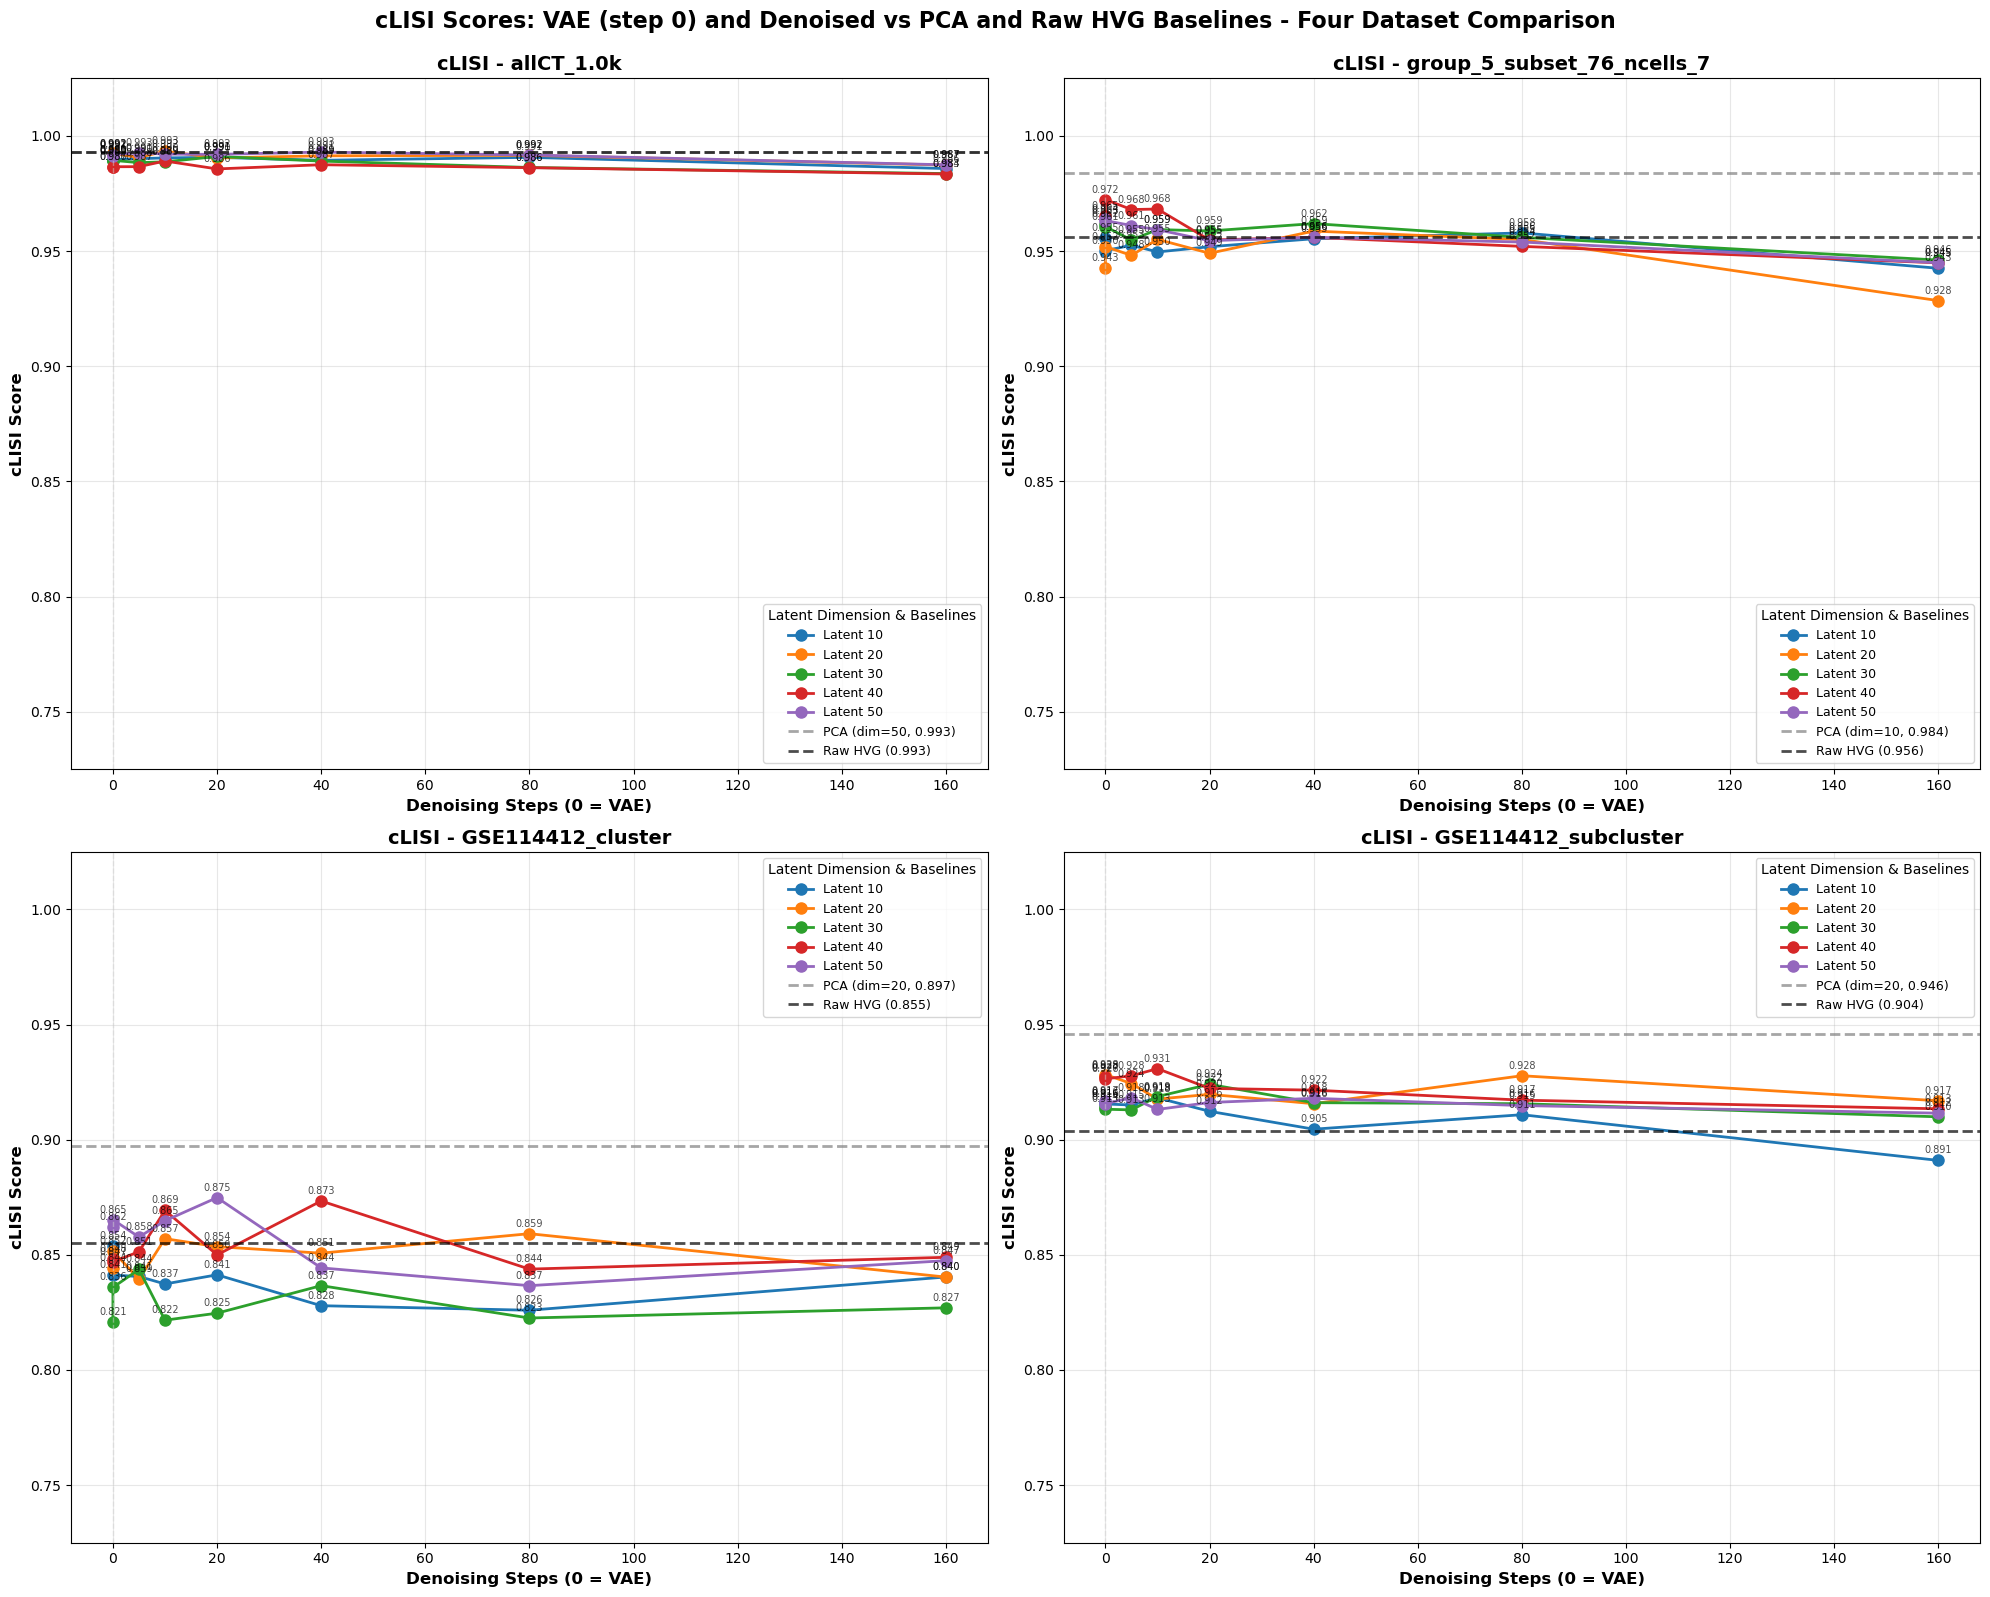


✓ Plot created with four datasets in 2x2 grid:
  Top row:
    - allCT_1.0k (left)
    - group_5_subset_76_ncells_7 (right)
  Bottom row:
    - GSE114412_cluster (left)
    - GSE114412_subcluster (right)


In [8]:
# ============================================================
# PLOT: Line plots - Denoise steps on X-axis, color by latent_dim
# Four-way comparison of datasets (INCLUDING VAE at 0 steps)
# WITH SAME Y-AXIS SCALE AND PCA/RAW REFERENCE LINES
# 2x2 GRID LAYOUT
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read all four CSV files
df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/grid_search_results_allCT_1.0k_final.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/grid_search_results_GSE114412_cluster_final.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/grid_search_results_group_5_subset_76_ncells_7_final.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/grid_search_results_GSE114412_subcluster_final.csv')

# Create 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Flatten axes array for easier iteration
axes_flat = axes.flatten()

# CHANGED: Reordered datasets so GSE datasets are in bottom row (positions 2 and 3)
datasets = [
    (df1, 'allCT_1.0k', axes_flat[0]),                      # Top-left
    (df3, 'group_5_subset_76_ncells_7', axes_flat[1]),     # Top-right
    (df2, 'GSE114412_cluster', axes_flat[2]),              # Bottom-left
    (df4, 'GSE114412_subcluster', axes_flat[3])            # Bottom-right
]

metric_denoised = 'clisi_denoised'
metric_vae = 'clisi_vae'
metric_pca = 'clisi_pca'
metric_raw = 'clisi_raw'

# Calculate global min and max for y-axis across all four datasets
all_values = []
for df, _, _ in datasets:
    all_values.extend(df[metric_denoised].tolist())
    all_values.extend(df[metric_vae].tolist())
    all_values.append(df[metric_pca].max())
    all_values.append(df[metric_raw].max())

y_min = 0.75  # min(all_values)
y_max = 1.0   # max(all_values)
y_range = y_max - y_min
y_padding = y_range * 0.1  # 10% padding

for df, dataset_name, ax in datasets:
    # Get best PCA and Raw scores for this dataset
    best_pca = df[metric_pca].max()
    best_raw = df[metric_raw].max()
    
    # Get best PCA latent dimension
    best_pca_latent = df.groupby('latent_dim')[metric_pca].max().idxmax()
    
    # Plot line for each latent dimension
    for latent_dim in sorted(df['latent_dim'].unique()):
        subset = df[df['latent_dim'] == latent_dim].sort_values('denoise_steps')
        
        # Get VAE score (same for all denoise_steps, so just take first row)
        vae_score = subset[metric_vae].iloc[0]
        
        # Create extended data including VAE at step 0
        denoise_steps_extended = [0] + subset['denoise_steps'].tolist()
        scores_extended = [vae_score] + subset[metric_denoised].tolist()
        
        # Plot the line
        ax.plot(denoise_steps_extended, scores_extended,
                marker='o', linewidth=2, markersize=8,
                label=f'Latent {int(latent_dim)}')
        
        # Add value label for VAE (at step 0)
        ax.annotate(f'{vae_score:.3f}',
                    xy=(0, vae_score),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', fontsize=7, alpha=0.7)
        
        # Add value labels for denoised points
        for _, row in subset.iterrows():
            ax.annotate(f'{row[metric_denoised]:.3f}',
                        xy=(row['denoise_steps'], row[metric_denoised]),
                        xytext=(0, 5), textcoords='offset points',
                        ha='center', fontsize=7, alpha=0.7)
    
    # Add horizontal reference lines for PCA and Raw
    ax.axhline(y=best_pca, color='gray', linestyle='--', linewidth=2,
               label=f'PCA (dim={int(best_pca_latent)}, {best_pca:.3f})', alpha=0.7)
    ax.axhline(y=best_raw, color='black', linestyle='--', linewidth=2,
               label=f'Raw HVG ({best_raw:.3f})', alpha=0.7)
    
    # Add vertical line at x=0 to highlight VAE
    ax.axvline(x=0, color='lightgray', linestyle='--', alpha=0.5, linewidth=1)
    
    ax.set_xlabel('Denoising Steps (0 = VAE)', fontsize=12, fontweight='bold')
    ax.set_ylabel('cLISI Score', fontsize=12, fontweight='bold')
    ax.set_title(f'cLISI - {dataset_name}', fontsize=14, fontweight='bold')
    ax.legend(title='Latent Dimension & Baselines', fontsize=9, loc='best')
    ax.grid(True, alpha=0.3)
    
    # Set same y-axis limits for all plots
    ax.set_ylim(y_min - y_padding, y_max + y_padding)

# Add overall title
fig.suptitle('cLISI Scores: VAE (step 0) and Denoised vs PCA and Raw HVG Baselines - Four Dataset Comparison',
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()

# Save the figure
plt.savefig('/novo/users/iwaq/figures/grid_search_lineplot_comparison_four_datasets_2x2.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plot created with four datasets in 2x2 grid:")
print("  Top row:")
print("    - allCT_1.0k (left)")
print("    - group_5_subset_76_ncells_7 (right)")
print("  Bottom row:")
print("    - GSE114412_cluster (left)")
print("    - GSE114412_subcluster (right)")

In [5]:
import pandas as pd
import json
import os

# Read datasets
dfs = {
    'allCT_1.0k': pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/grid_search_results_allCT_1.0k_final.csv'),
    'GSE114412_cluster': pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/grid_search_results_GSE114412_cluster_final.csv'),
    'project_group_5_subset_76_ncells_7': pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/grid_search_results_group_5_subset_76_ncells_7_final.csv'),
    'GSE114412_subcluster': pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/grid_search_results_GSE114412_subcluster_final.csv')
}

metric = 'clisi_denoised'
metric_pca = 'clisi_pca'

# Calculate best dimension and best denoise steps (excluding 0) for each dataset
for name, df in dfs.items():
    best_dim = df.groupby('latent_dim')[metric].mean().idxmax()
    best_row = df[(df['latent_dim'] == best_dim) & (df['denoise_steps'] > 0)].nlargest(1, metric).iloc[0]
    
    # Get best PCA dimension - find which latent_dim has highest clisi_pca
    best_pca_latent = df.groupby('latent_dim')[metric_pca].max().idxmax()
    best_pca_score = df.groupby('latent_dim')[metric_pca].max()[best_pca_latent]
    
    # Create results dictionary
    results = {
        "dataset": name,
        "best_denoised": {
            "latent_dim": int(best_dim),
            "denoise_steps": int(best_row['denoise_steps']),
            "clisi_score": float(best_row[metric])
        },
        "best_pca": {
            "latent_dim": int(best_pca_latent),
            "clisi_score": float(best_pca_score)
        }
    }
    
    # Save to JSON file
    output_path = f'/novo/users/iwaq/multi/project_{name}/results/best_hyperparameters.json'
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, 'w') as f:
        json.dump(results, f, indent=2)
    
    print(f"{name}:")
    print(f"  Best latent_dim = {int(best_dim)}, denoise_steps = {int(best_row['denoise_steps'])}, score = {best_row[metric]:.4f}")
    print(f"  Best PCA latent_dim = {int(best_pca_latent)}, score = {best_pca_score:.4f}")
    print(f"  Saved to: {output_path}\n")

allCT_1.0k:
  Best latent_dim = 50, denoise_steps = 40, score = 0.9930
  Best PCA latent_dim = 50, score = 0.9928
  Saved to: /novo/users/iwaq/multi/project_allCT_1.0k/results/best_hyperparameters.json

GSE114412_cluster:
  Best latent_dim = 50, denoise_steps = 20, score = 0.8749
  Best PCA latent_dim = 20, score = 0.8975
  Saved to: /novo/users/iwaq/multi/project_GSE114412_cluster/results/best_hyperparameters.json

project_group_5_subset_76_ncells_7:
  Best latent_dim = 40, denoise_steps = 10, score = 0.9682
  Best PCA latent_dim = 10, score = 0.9840
  Saved to: /novo/users/iwaq/multi/project_project_group_5_subset_76_ncells_7/results/best_hyperparameters.json

GSE114412_subcluster:
  Best latent_dim = 40, denoise_steps = 10, score = 0.9309
  Best PCA latent_dim = 20, score = 0.9459
  Saved to: /novo/users/iwaq/multi/project_GSE114412_subcluster/results/best_hyperparameters.json

